# Model Selection
We'll be talking about how to choose a machine learning model based on the problem at hand. 

We'll use a factory part dataset as an example. Suppose a factory creates small screws. The factory has recorded the deviation in length and radius from the expected dimension, as well as whether or not the screws fit when used in construction. If a screw will not fit when used in construction, then it is considered a failure. The factory wants to create a machine learning model to determine if screws produced in the future will fail.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import style; style.use('ggplot')

In [2]:
data = np.loadtxt('factory_data.txt', delimiter=',')

In [3]:
X = data[:, [0, 1]]
y = data[:, -1]
m = y.size

In [4]:
def plot_data():
    """ Plots data """
    
    # need to put this inside function, does not work at top
    plt.rcParams['figure.figsize'] = [6, 6]
    
    # acceptable: green, rejected: red
    for i in range(m):
        if y[i] == 1: plt.scatter(X[i, 0], X[i, 1], color='green')
        if y[i] == 0: plt.scatter(X[i, 0], X[i, 1], color='red')
    
    # label and show plot
    plt.title('Factory Standards')
    plt.xlabel('Deviation in Length')
    plt.ylabel('Deviation in Radius')
    plt.show()
    
    return None

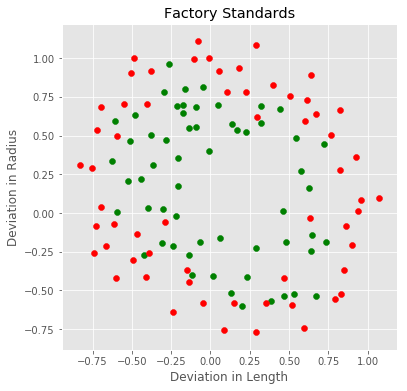

In [5]:
plot_data()

In [6]:
def decision_boundary(clf):
    """ Plots decision boundary given a classifier """
    
    # need to put this inside function, does not work at top
    plt.rcParams['figure.figsize'] = [6, 6]
    
    # entire grid
    X1, X2 = np.meshgrid(np.arange(start=min(X[:, 0]), stop=max(X[:, 0]), step=0.01),
                         np.arange(start=min(X[:, 1]), stop=max(X[:, 1]), step=0.01))
    
    # plot predictions
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.5, cmap=ListedColormap(('lightpink', 'lightgreen')))
    
    # show original data on top
    plot_data()
    
    return None

## Let's try some classifiers! We'll start with the stuff you've already seen...

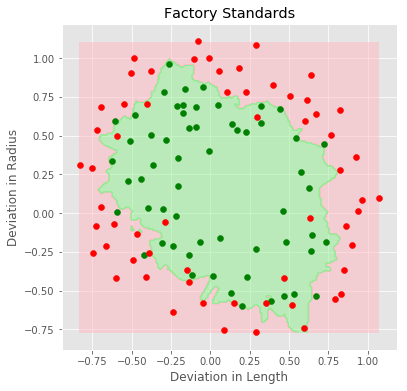

In [7]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
decision_boundary(knn)

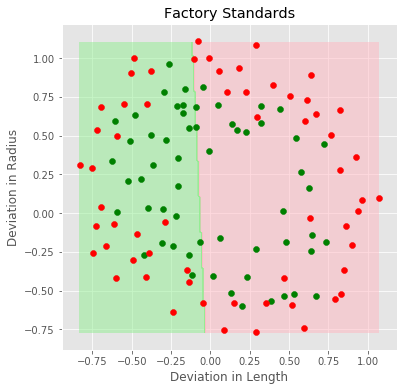

In [8]:
# logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, solver='lbfgs')
log_reg.fit(X, y)
decision_boundary(log_reg)

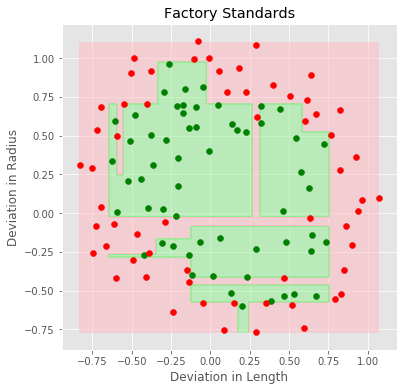

In [9]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=None)
tree.fit(X, y)
decision_boundary(tree)

## Now, for some new classifiers! This is where the fun begins...

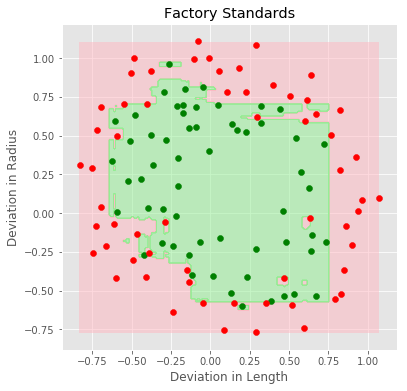

In [10]:
# random forest
from sklearn.ensemble import RandomForestClassifier
""" try different numbers of trees: 1 (same as decision tree?), 5, 10, 100 """
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X, y)
decision_boundary(forest)

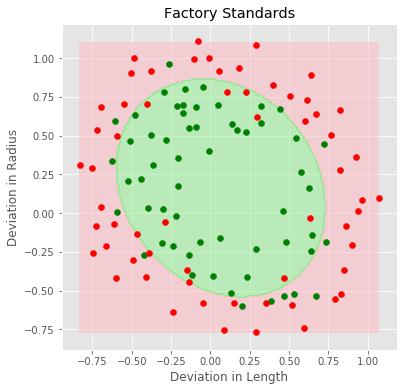

In [11]:
# SVM
from sklearn.svm import SVC
""" try rbf kernel, poly kernel with degree 1, 2 """
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X, y)
decision_boundary(svm)

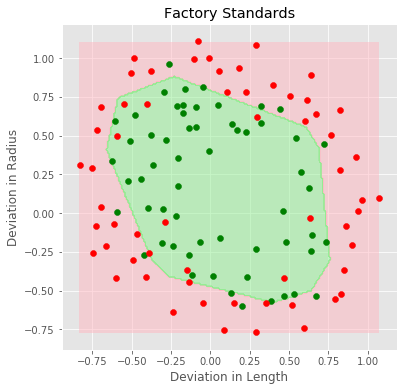

In [14]:
# neural net
from sklearn.neural_network import MLPClassifier
""" run it a bunch of times """
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000)
nn.fit(X, y)
decision_boundary(nn)

## Recap:
When choosing a machine learning model, here are some things to consider:
- number of data points
- number of features
- type of task
- evaluation metrics
- avoiding underfitting
- avoiding overfitting
- linear separability

Generally, you want to choose a model that's complex enough to learn the associations in your training data, but not so complex that it memorizes the training data and performs badly on never-before-seen test data.